In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
df = pd.read_csv("redditSubmissions.csv", error_bad_lines=False)

b'Skipping line 67828: expected 13 fields, saw 16\nSkipping line 67829: expected 13 fields, saw 16\nSkipping line 67830: expected 13 fields, saw 16\nSkipping line 67831: expected 13 fields, saw 16\nSkipping line 67832: expected 13 fields, saw 14\n'


In [3]:
df['title'][:25]

0                                And here's a downvote.
1                                           Expectation
2                                              Downvote
3                       Every time I downvote something
4                        Downvote &quot;Dies Irae&quot;
5           Demolished, every time you downvote someone
6                     how i feel whenever i submit here
7             getting that first downvote on a new post
8     How reddit seems to reacts whenever I share a ...
9              Every LastAirBender post with a NSFW tag
10    How I felt when i forgot to put &quot;spoiler&...
11    What r/AskReddit did to me when I asked someth...
12          My brother when he found my reddit account.
13    The reaction i face when i express a view for ...
14                              How I feel on r/atheism
15       When I see a rage comic out of its sub Reddit.
16    Sitting as a /new knight of /r/gaming seeing a...
17    How I act when I see a &quot;How I feel wh

In [4]:
df['#image_id'].nunique()

16736

In [5]:
df = df.drop(['unixtime', 'rawtime' ,'reddit_id', 'localtime', '#image_id', 'username'], axis = 1)
df = df.drop([53033])

In [6]:
df.shape

(132302, 7)

In [7]:
df_top = df.sort_values(by='score', ascending = False)[:20000]
df_top = df_top.reset_index(drop=True)

In [8]:
df_top.head()

,title,total_votes,number_of_upvotes,subreddit,number_of_downvotes,score,number_of_comments
0,The Bus Knight,114964.0,67767.0,funny,47197.0,20570.0,1463.0
1,So my little cousin posted on FB that he was b...,114451.0,63392.0,funny,51059.0,12333.0,1612.0
2,My friend calls him &quot;Mr Ridiculously Phot...,92874.0,52391.0,pics,40483.0,11908.0,2681.0
3,This is called humanity.,62718.0,36490.0,pics,26228.0,10262.0,1514.0
4,President Obama's new campaign poster,30907.0,19921.0,fffffffuuuuuuuuuuuu,10986.0,8935.0,480.0


In [9]:
df_dummy = pd.get_dummies(df_top, columns = ['subreddit'])

In [10]:
def concat(title):
    title = title[:20]
    if title[-1] == " ":
        title = title[:-1]
    return title

df_dummy['title'] = df_dummy['title'].apply(concat)
df_dummy.head()

,title,total_votes,number_of_upvotes,number_of_downvotes,score,number_of_comments,subreddit_4chan,subreddit_: funny,subreddit_AbandonedPorn,subreddit_AdrenalinePorn,...,subreddit_waterporn,subreddit_web_design,subreddit_wheredidthesodago,subreddit_woahdude,subreddit_workaholics,subreddit_worldnews,subreddit_worldpolitics,subreddit_wow,subreddit_zelda,subreddit_zombies
0,The Bus Knight,114964.0,67767.0,47197.0,20570.0,1463.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,So my little cousin,114451.0,63392.0,51059.0,12333.0,1612.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,My friend calls him,92874.0,52391.0,40483.0,11908.0,2681.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,This is called human,62718.0,36490.0,26228.0,10262.0,1514.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,President Obama's ne,30907.0,19921.0,10986.0,8935.0,480.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dummy = df_dummy.set_index('title')

In [12]:
df_dummy

,total_votes,number_of_upvotes,number_of_downvotes,score,number_of_comments,subreddit_4chan,subreddit_: funny,subreddit_AbandonedPorn,subreddit_AdrenalinePorn,subreddit_AdviceAnimals,...,subreddit_waterporn,subreddit_web_design,subreddit_wheredidthesodago,subreddit_woahdude,subreddit_workaholics,subreddit_worldnews,subreddit_worldpolitics,subreddit_wow,subreddit_zelda,subreddit_zombies
title,,,,,,,,,,,,,,,,,,,,,
The Bus Knight,114964.0,67767.0,47197.0,20570.0,1463.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
So my little cousin,114451.0,63392.0,51059.0,12333.0,1612.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
My friend calls him,92874.0,52391.0,40483.0,11908.0,2681.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
This is called human,62718.0,36490.0,26228.0,10262.0,1514.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
President Obama's ne,30907.0,19921.0,10986.0,8935.0,480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Conception,11371.0,5978.0,5393.0,585.0,49.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"A chipmunk, in the s",1257.0,921.0,336.0,585.0,61.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ready to walk throug,1993.0,1289.0,704.0,585.0,265.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(0.0, 5.0)

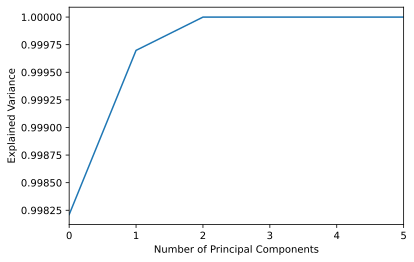

In [13]:
pca = PCA()

df_top_pca = pca.fit_transform(df_dummy)
exp_variances = pca.explained_variance_ratio_.cumsum()

plt.plot(exp_variances);
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.xlim([0, 5])

In [14]:
df_top_pca = df_top_pca[:,:2]
df_top_pca.shape

(20000, 2)

In [15]:
dists = pairwise_distances(df_top_pca, metric='cosine')
dists.shape

(20000, 20000)

In [16]:
dists = pd.DataFrame(data=dists, index=df_dummy.index, columns=df_dummy.index)

In [17]:
dists

title,The Bus Knight,So my little cousin,My friend calls him,This is called human,President Obama's ne,Genius,Poster ad for the Ca,I'm sorry pinata bro,Walked in on my son,When I found out I c,...,We shall win much ho,How to leave reddit,Really?,Get me the fuck out,"Reddit, for my caked",Conception,"A chipmunk, in the s",Ready to walk throug,When someone speaks,How it feels opening
title,,,,,,,,,,,,,,,,,,,,,
The Bus Knight,0.000000,0.002968,0.001438,0.000051,0.017921,0.004676,0.004927,0.000505,0.005633,0.008610,...,1.999181,1.995400,0.035781,1.999317,1.847852,0.995730,1.992654,1.993168e+00,1.994910,1.993085e+00
So my little cousin,0.002968,0.000000,0.000275,0.002242,0.035347,0.000193,0.000247,0.001026,0.000424,0.001471,...,1.993099,1.999822,0.018231,1.999196,1.804510,0.918749,1.999023,1.999205e+00,1.999715,1.999176e+00
My friend calls him,0.001438,0.000275,0.000000,0.000948,0.029436,0.000929,0.001043,0.000239,0.001381,0.003016,...,1.995575,1.999105,0.022956,1.999861,1.818209,0.942130,1.997713,1.997996e+00,1.998881,1.997950e+00
This is called human,0.000051,0.002242,0.000948,0.000000,0.019873,0.003751,0.003976,0.000235,0.004614,0.007338,...,1.998722,1.996317,0.033153,1.999639,1.842455,0.985634,1.993825,1.994296e+00,1.995877,1.994219e+00
President Obama's ne,0.017921,0.035347,0.029436,0.019873,0.000000,0.040716,0.041444,0.024404,0.043429,0.051054,...,1.988901,1.959506,0.103024,1.974445,1.932590,1.184273,1.952063,1.953378e+00,1.958089,1.953162e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Conception,0.995730,0.918749,0.942130,0.985634,1.184273,0.899163,0.896610,0.963964,0.889762,0.864829,...,0.963802,1.100052,0.730780,1.041217,0.473392,0.000000,1.125223,1.120930e+00,1.105014,1.121639e+00
"A chipmunk, in the s",1.992654,1.999023,1.997713,1.993825,1.952063,1.999699,1.999759,1.995997,1.999886,1.999950,...,0.013054,0.000321,1.989210,0.003553,0.222527,1.125223,0.000000,9.357171e-06,0.000207,6.520697e-06
Ready to walk throug,1.993168,1.999205,1.997996,1.994296,1.953378,1.999796,1.999844,1.996374,1.999942,1.999897,...,0.012367,0.000221,1.988567,0.003198,0.219813,1.120930,0.000009,0.000000e+00,0.000128,2.554138e-07


In [18]:
my_posts = ['The Bus Knight', 'Conception', 'When someone speaks']
dists[my_posts].head()

title,The Bus Knight,The Bus Knight,Conception,When someone speaks
title,,,,
The Bus Knight,0.000000,1.987405,0.995730,1.994910
So my little cousin,0.002968,1.996656,0.918749,1.999715
My friend calls him,0.001438,1.994467,0.942130,1.998881
This is called human,0.000051,1.988952,0.985634,1.995877
President Obama's ne,0.017921,1.939893,1.184273,1.958089


In [20]:
my_sum = dists[my_posts].sum(axis=1)
my_sum = my_sum.sort_values(ascending=True)

my_mask = ~my_sum.index.isin(my_posts)
ranked_posts = my_sum.index[my_mask]
ranked_posts = ranked_posts.tolist()

ranked_posts[:10]

['C-C-C-C-C-CHOO-CHOO!',
 'Where is the damn ca',
 'A Ron Swanson breakf',
 'How I feel whenever',
 '007 big head mode in',
 'Parenting will be ea',
 'Found this on Facebo',
 "I've been thinking f",
 'Model helicopter',
 "The only repost I'll"]